<a href="https://colab.research.google.com/github/TemiswiftAdeniyi/Loan-Distribution/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
mpl.style.use('ggplot')

In [3]:
pd.read_csv('/content/car_data - car_data.csv')

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
car_df = pd.read_csv('/content/car_data - car_data.csv')

In [5]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:
car_df.shape

(892, 6)

Data Cleaning


In [7]:
car_df=car_df[car_df.year.str.isnumeric()]

In [8]:
car_df['year']=car_df['year'].astype(int)

In [9]:
car_df=car_df[car_df['Price']!='Ask For Price']

In [10]:
car_df['Price']=car_df['Price'].str.replace(',','').astype(int)

In [11]:
car_df['kms_driven']=car_df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [12]:
car_df=car_df[car_df['kms_driven'].str.isnumeric()]
car_df['kms_driven']=car_df['kms_driven'].astype(int)

In [13]:
car_df=car_df[~car_df['fuel_type'].isna()]

In [14]:
car_df['name']=car_df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [15]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [16]:
car_df=car_df.reset_index(drop=True)

In [17]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


Checking Relationship of Company with Price

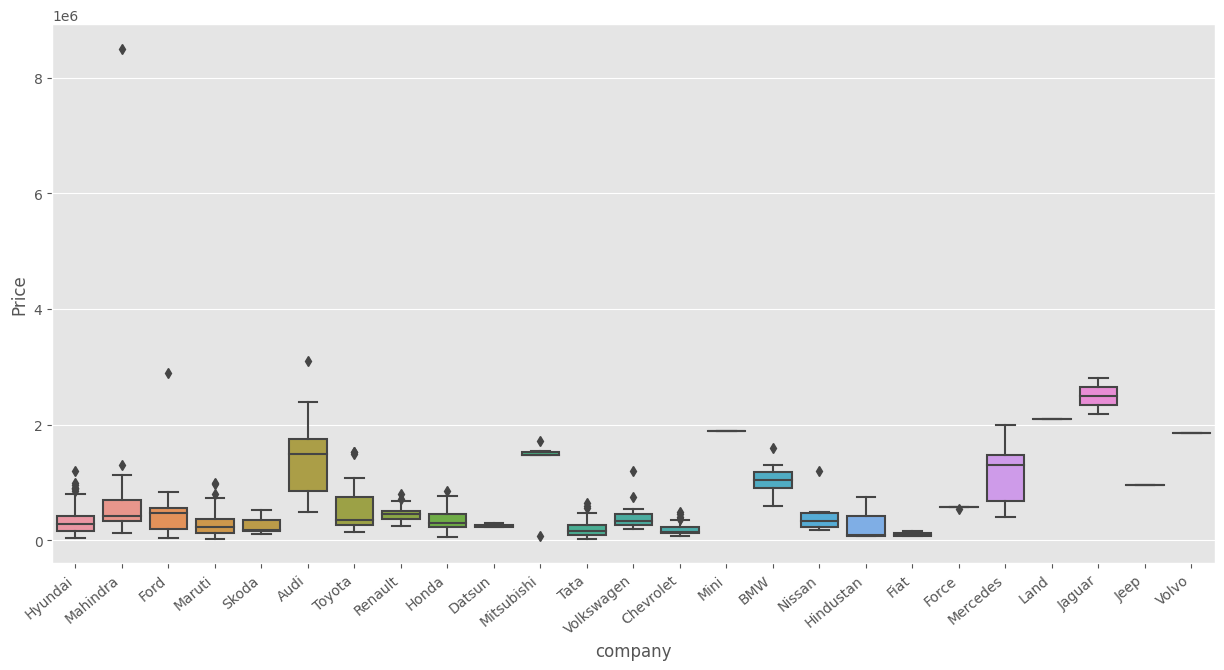

In [18]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [19]:
car_df.groupby('company').mean()['Price']

company
Audi          1.476909e+06
BMW           1.049875e+06
Chevrolet     2.020853e+05
Datsun        2.557140e+05
Fiat          1.098750e+05
Force         5.725000e+05
Ford          4.797999e+05
Hindustan     3.033333e+05
Honda         3.476329e+05
Hyundai       3.184028e+05
Jaguar        2.495000e+06
Jeep          9.500000e+05
Land          2.100000e+06
Mahindra      6.034367e+05
Maruti        2.698376e+05
Mercedes      1.170667e+06
Mini          1.891111e+06
Mitsubishi    1.298333e+06
Nissan        4.606663e+05
Renault       4.605123e+05
Skoda         2.511914e+05
Tata          2.009393e+05
Toyota        5.244443e+05
Volkswagen    4.071050e+05
Volvo         1.850000e+06
Name: Price, dtype: float64

Checking Relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

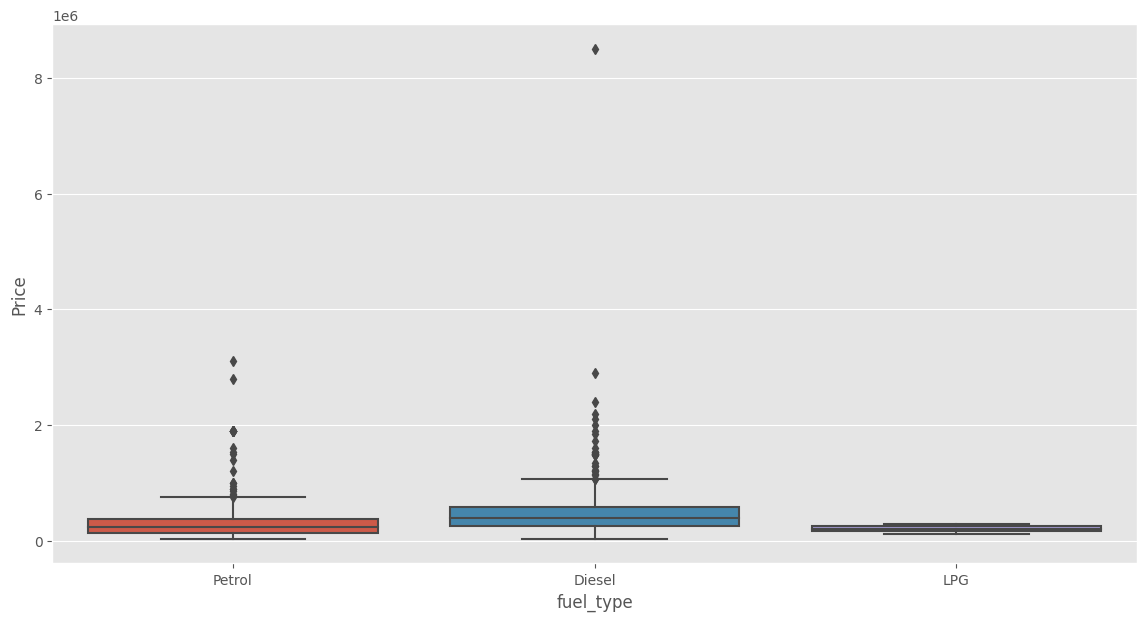

In [20]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car_df)

In [21]:
X=car_df[['name','company','year','kms_driven','fuel_type']]
y=car_df['Price']

In [23]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


Training and Testing

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

One HotEncoder

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [26]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [27]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [30]:
pipe=make_pipeline(column_trans,lr)

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [32]:
y_pred=pipe.predict(X_test)

R2 Score


In [33]:
r2_score(y_test,y_pred)

0.32304492234266224

Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [34]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print(r2_score(y_test,y_pred),i)
    scores.append(r2_score(y_test,y_pred))

0.5796482177913818 0
0.46018857093334165 1
0.34899371623571795 2
0.5194515907152469 3
0.7055596091161452 4
0.5611389470719478 5
0.6570921999317583 6
0.45711183858942095 7
0.4679280891364873 8
0.699404697614971 9
0.5705473651248996 10
0.5126720392169457 11
0.45001719304795573 12
0.5672403175505203 13
0.5792442701350649 14
0.6910836720971525 15
0.44541085478394393 16
0.5118184203602891 17
0.46009153337866415 18
0.4461002917962974 19
0.6964142794338408 20
0.3485457913297454 21
0.7682905008640598 22
0.5630183422797811 23
0.45450183719174375 24
0.41251351932635305 25
0.6343644379479343 26
0.7558364555351962 27
0.5249337254648845 28
0.7276099805776262 29
0.7275319277186802 30
0.6873221077783225 31
0.5628105602760439 32
0.4904019794324771 33
0.11034374577810846 34
0.1631363589939685 35
0.6282280195429284 36
0.5225989065589447 37
0.2071308484733756 38
0.717763099097392 39
0.07530113974670571 40
0.5958940762343214 41
0.1072230534972658 42
0.4810986760483391 43
0.4542858321963904 44
0.5814073483

In [35]:
np.argmax(scores)

247

In [36]:
scores[np.argmax(scores)]

0.8604602644312209

In [37]:
import pickle

In [38]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2018,100,'Petrol']).reshape(1,5)))

array([421107.13785714])